In [1]:
%load_ext autoreload
%autoreload 2

import os
from datetime import datetime
from time import time
# import dill
import pickle
import glob
import importlib
import numpy as np
import scipy as sp
import scipy.misc
import pandas as pd
import re
import itertools
from scanf import scanf
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm, PowerNorm, Normalize
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate, optimize, sparse
from scipy.interpolate import interp1d, interp2d
from IPython.display import display, HTML, Math
from scipy import interpolate
from tqdm.notebook import tqdm as tqdm_notebook

# from act_act_src import baseClass
from act_src import particleClass
from act_src import interactionClass
from act_src import problemClass
from act_src import relationClass
from act_codeStore.support_class import *
from act_codeStore import support_fun as spf
from act_codeStore import support_fun_calculate as spc

PWD = os.getcwd()
np.set_printoptions(linewidth=110, precision=5)

params = {'animation.html': 'html5',
          'font.family':    'sans-serif',
          'font.size':      15, }
preamble = r' '
preamble = preamble + '\\usepackage{bm} '
preamble = preamble + '\\usepackage{amsmath} '
preamble = preamble + '\\usepackage{amssymb} '
preamble = preamble + '\\usepackage{mathrsfs} '
preamble = preamble + '\\DeclareMathOperator{\\Tr}{Tr} '
params['text.latex.preamble'] = preamble
params['text.usetex'] = True
plt.rcParams.update(params)

In [2]:
from act_codeStore.support_class import *
from act_codeStore import support_fun as spf
from act_codeStore import support_fun_calculate as spc
from act_codeStore import support_fun_show as sps
from collectiveFish.do_calculate import *

remove folder try_phaseLag2D
make folder try_phaseLag2D
 
Collective motion solve, Zhang Ji, 2021. 
########################################################################
Generate Problem. 
  All the particles have a unified speed=1.000000, 
  All the particles have a unified length=-1.000000, 
  All the particles have a unified spin=0.000000, 
  Generate 3 particles with random seed None
  Generate method: random_sample. 
 
Solve, start time: 2023-06-13 20:14:48
 
Information about try_phaseLag2D (behavior2DProblem): 
  This is a 2 dimensional problem, contain 3 objects. 
  update function: 1fe, update order: (0, 0), max loop: 1000000000
  t0=0.000000, t1=10000.000000, dt=1.000000
  save log file to try_phaseLag2D/log.try_phaseLag2D 
  save pickle file to try_phaseLag2D/pickle.try_phaseLag2D 
  rotational noise: 0.010000, translational noise: 0.000000
  align: 2.500000, attract: 0.000000, viewRange: 1.000000, 
 
Information about selfPropelled2D (selfPropelled2D): 
  None
 
Informat

  try_phaseLag2D:   0%|          | 0/100 [00:00<?, ?it/s]

Solve, finish time: 2023-06-13 20:14:50
Solve, usage time: 0:00:01.259064
 


(<Figure size 960x540 with 2 Axes>, True)

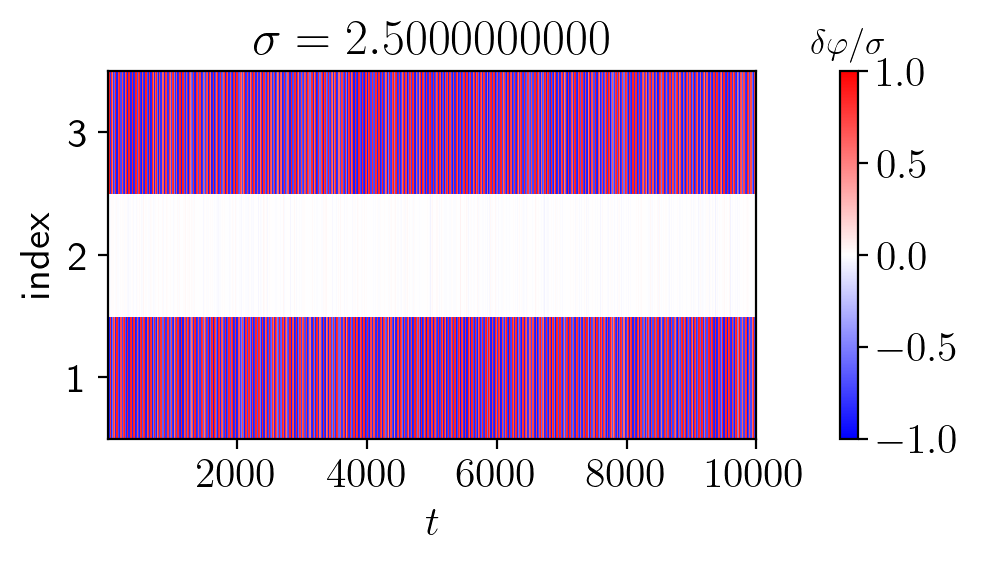

[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 213
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 50
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 5
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 0
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 32
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 0
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 0
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 213
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 50
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 5
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 0
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 32
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 0
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 0
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 213
[Ji4090:32326] 

[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 213
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 50
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 5
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 0
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 32
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 0
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 0
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 213
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 50
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 5
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 0
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 32
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 0
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 0
[Ji4090:32326] tcp_peer_recv_connect_ack: invalid header type: 213
[Ji4090:32326] 

In [28]:
# update_fun, update_order, eval_dt = '5f', (1e-6, 1e-9), 1
update_fun, update_order, eval_dt = '1fe', (0, 0), 1
nptc, calculate_fun = 3, 'do_phaseLagWiener2D'
ini_t, max_t, Xlim = np.float64(0), eval_dt * 1e4, 1
seed = None
align, phaseLag2D = 2.5, 0 * np.pi * np.pi
rot_noise, trs_noise = 0.01, 0 

problem_kwargs = {
    'ini_t':           ini_t,
    'max_t':           max_t,
    'update_fun':      update_fun,
    'update_order':    update_order,
    'eval_dt':         eval_dt,
    'calculate_fun':   calculate_fun_dict[calculate_fun],
    'prbHandle':       prbHandle_dict[calculate_fun],
    'rltHandle':       rltHandle_dict[calculate_fun],
    'ptcHandle':       ptcHandle_dict[calculate_fun],
    'fileHandle':      'try_phaseLag2D',
    'save_every':      np.int64(1),
    'nptc':            np.int64(nptc),
    'overlap_epsilon': np.float64(0),
    'un':              np.float64(1),
    'ln':              np.float64(-1),
    'Xlim':            np.float64(Xlim),
    'Xrange':          np.float64(Xlim),
    'attract':         np.float64(0),
    'align':           np.float64(align),
    'viewRange':       np.float64(1),
    'localRange':      np.float64(1e10),
    'phaseLag2D':      np.float64(phaseLag2D),
    'LJ_A':            np.float64(0),
    'LJ_B':            np.float64(0),
    'LJ_a':            np.float64(0),
    'LJ_b':            np.float64(0),
    'rot_noise':       rot_noise, 
    'trs_noise':       trs_noise, 
    'seed':            seed,
    'tqdm_fun':        tqdm_notebook,
}

doPrb1 = problem_kwargs['calculate_fun'](**problem_kwargs)
prb1 = doPrb1.do_calculate(ini_t=ini_t, max_t=max_t, eval_dt=eval_dt, )
# do_hdf5(prb1, **problem_kwargs)
# prb1.hdf5_load(showInfo=False)

################################################################################3

# %matplotlib notebook
%matplotlib inline

figsize = np.array((16, 9)) * 0.3
dpi = 200 if 'inline' in matplotlib.get_backend() else 100
plt_tmin = max_t * 0
markevery = 0.1
# # 
# resampling_fct, interp1d_kind = None, 'linear'
# sps.show_fig_fun(prb1, sps.core_trajectory2D, figsize=None, dpi=dpi, 
#                  plt_tmin=plt_tmin, resampling_fct=resampling_fct)
#
resampling_fct, interp1d_kind = 1, 'linear'
sps.show_fig_fun(prb1, sps.core_avrPhaseVelocity, figsize=figsize, dpi=dpi, 
                 plt_tmin=plt_tmin, resampling_fct=resampling_fct, npabs=False, 
                 tavr=0.1)

  0%|          | 0/10001 [00:00<?, ?it/s]

  0%|          | 0/10001 [00:00<?, ?it/s]

[-2.25559 -1.61903]
[0.50808 0.50808 1.08576]


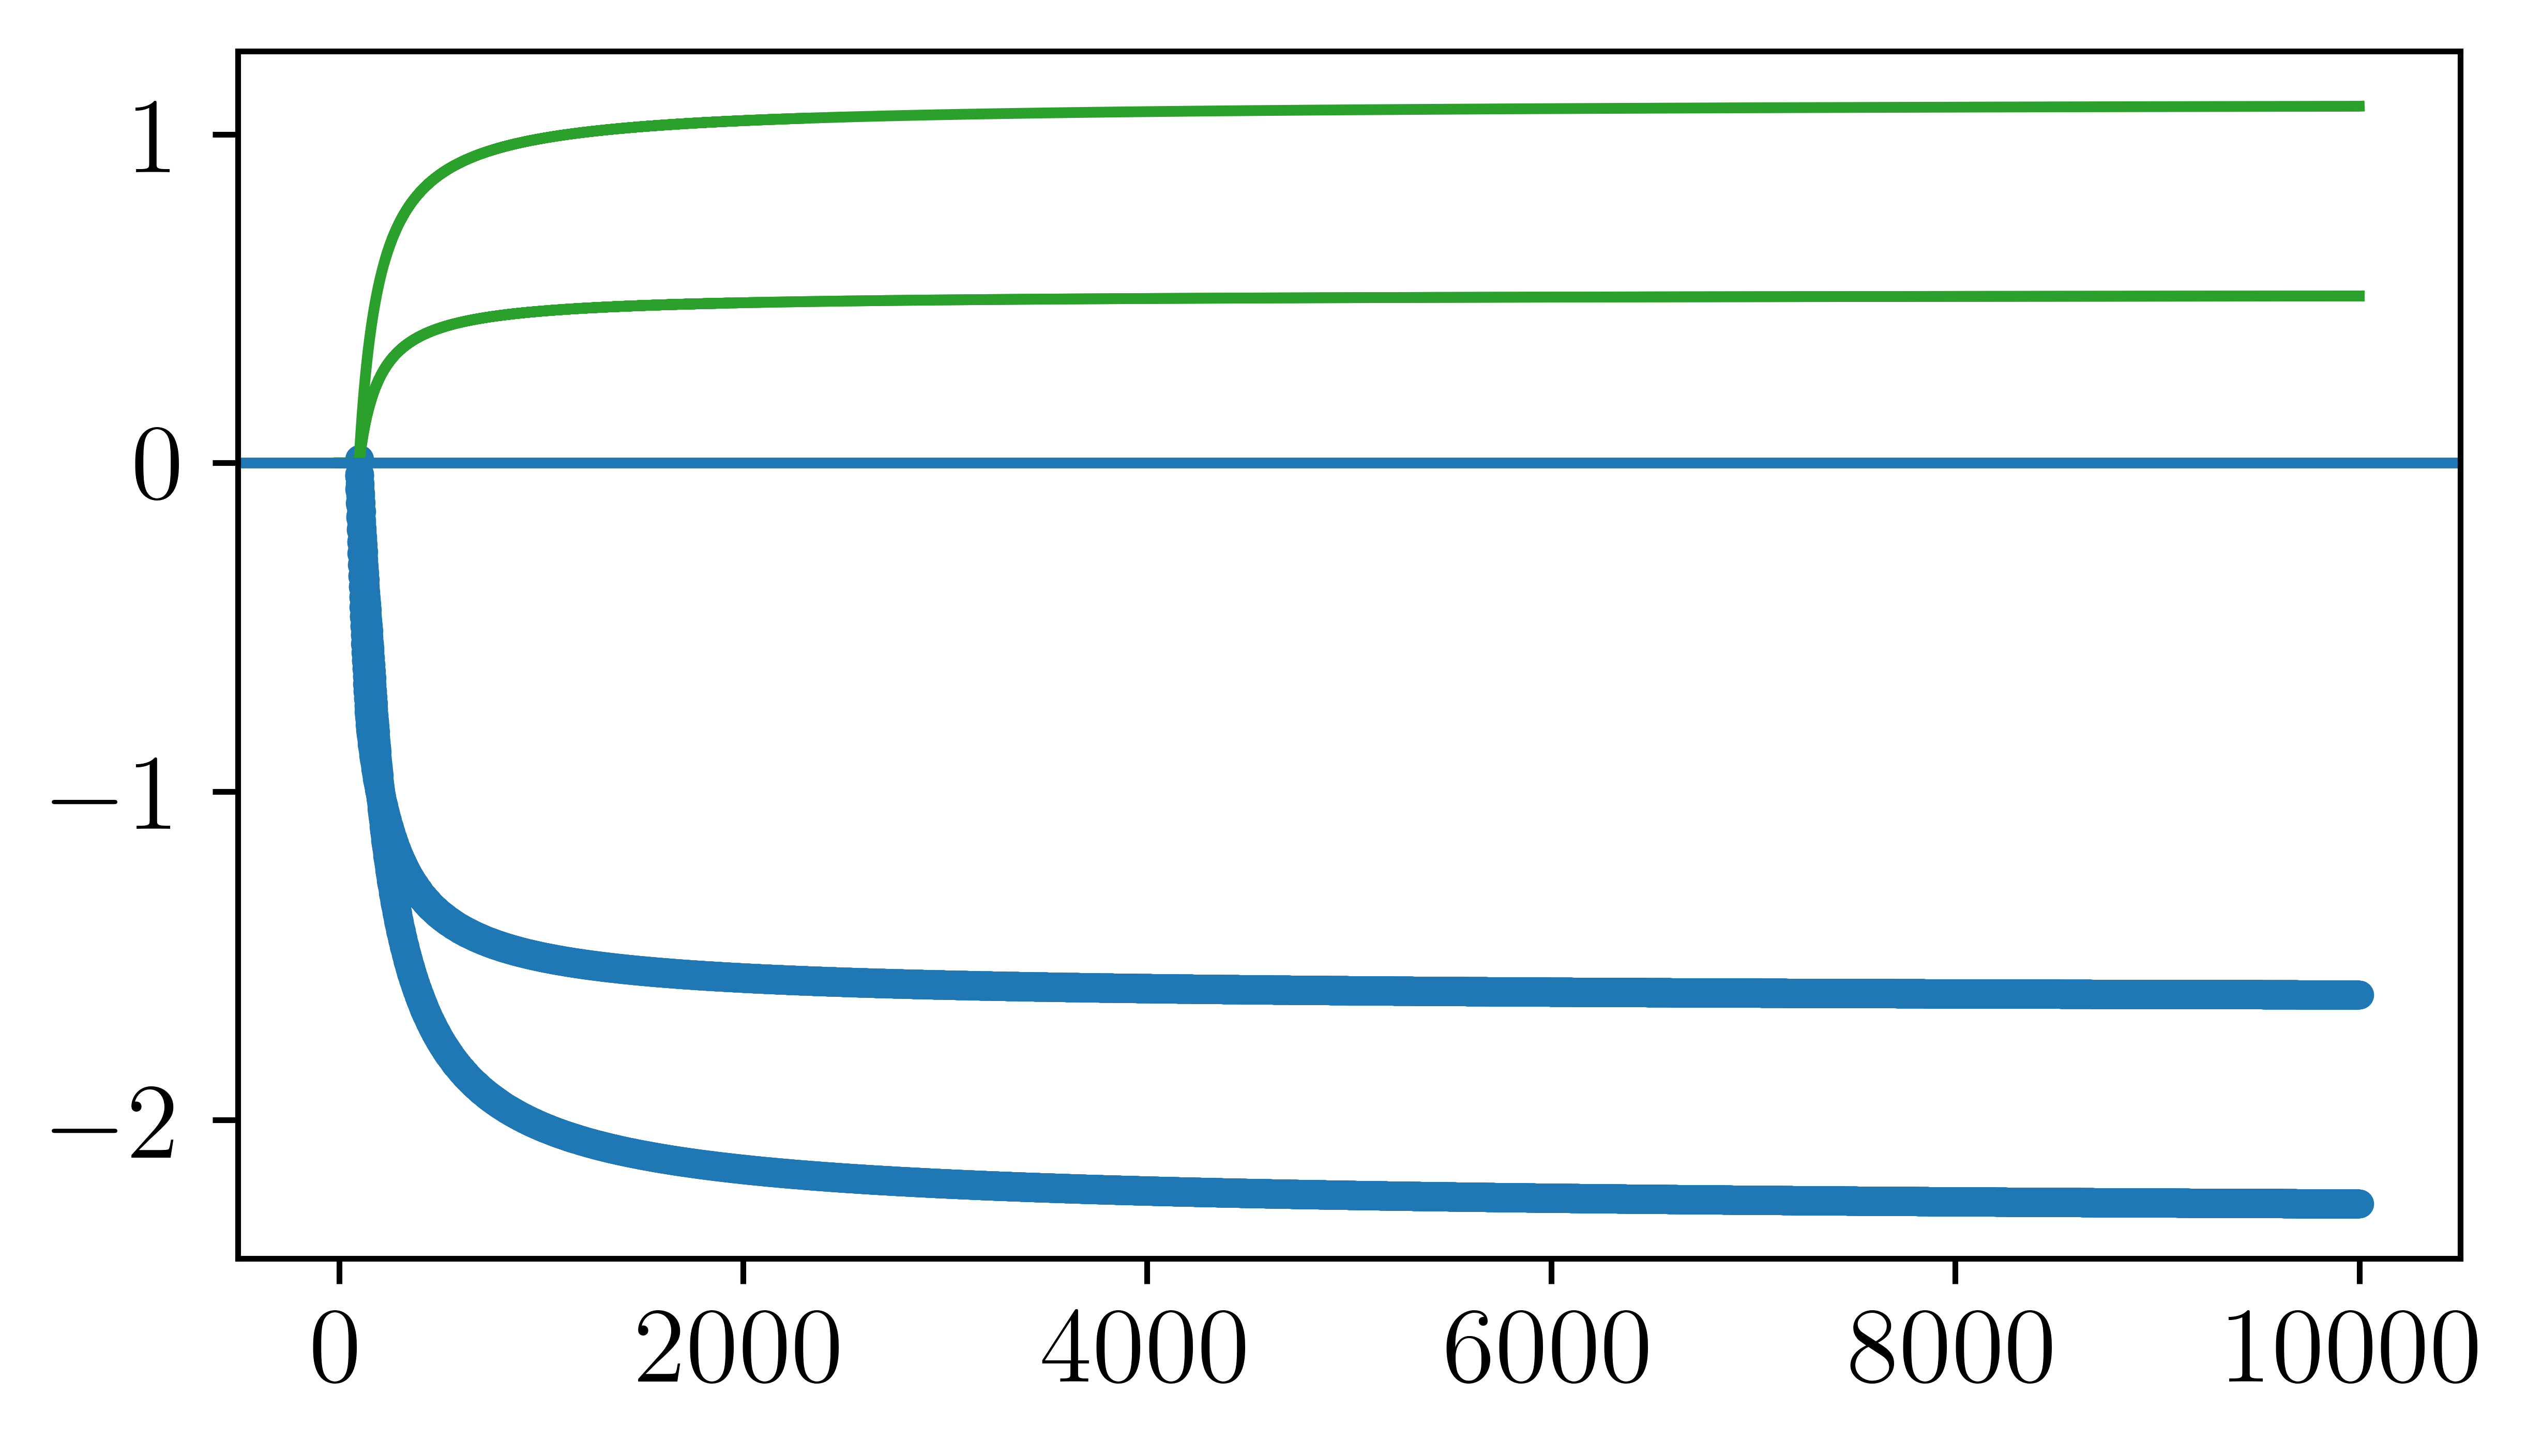

In [4]:
from act_codeStore import support_fun_kuramoto as spk

Lyp_ign = 1e2
lmd_all1 = spk.Lyp_QR_Sakaguchi_kuramoto(prb1, tqdm_fun=tqdm_notebook, Lyp_ign=Lyp_ign) 
lmd_obj1 = spk.Lyp_obj_Sakaguchi_kuramoto(prb1, tqdm_fun=tqdm_notebook, Lyp_ign=Lyp_ign) 

# show ------------------------------------------------
figsize = np.array((16, 9)) * 0.3
dpi = 1000
fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
axi.plot(prb1.t_hist, lmd_all1, '.C0')
axi.plot(prb1.t_hist, lmd_obj1, '-C2')
axi.axhline(0)
print(lmd_all1[-1])
print(lmd_obj1[-1])


(<Figure size 960x540 with 2 Axes>, True)

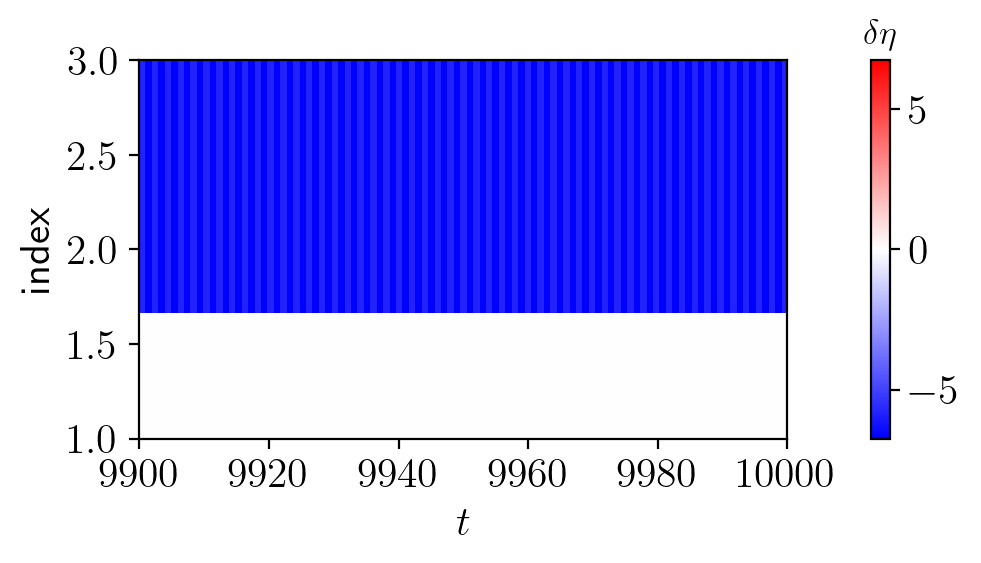

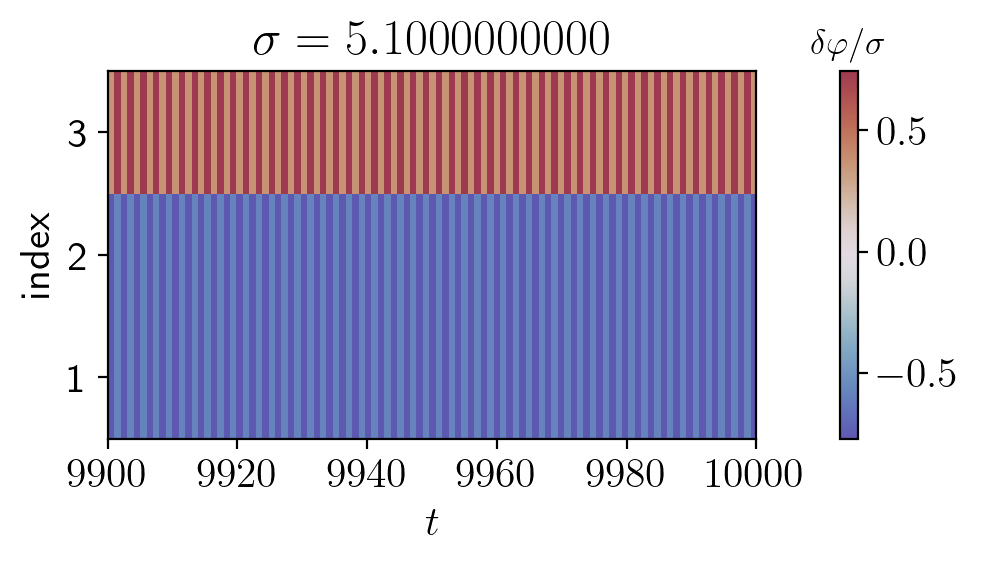

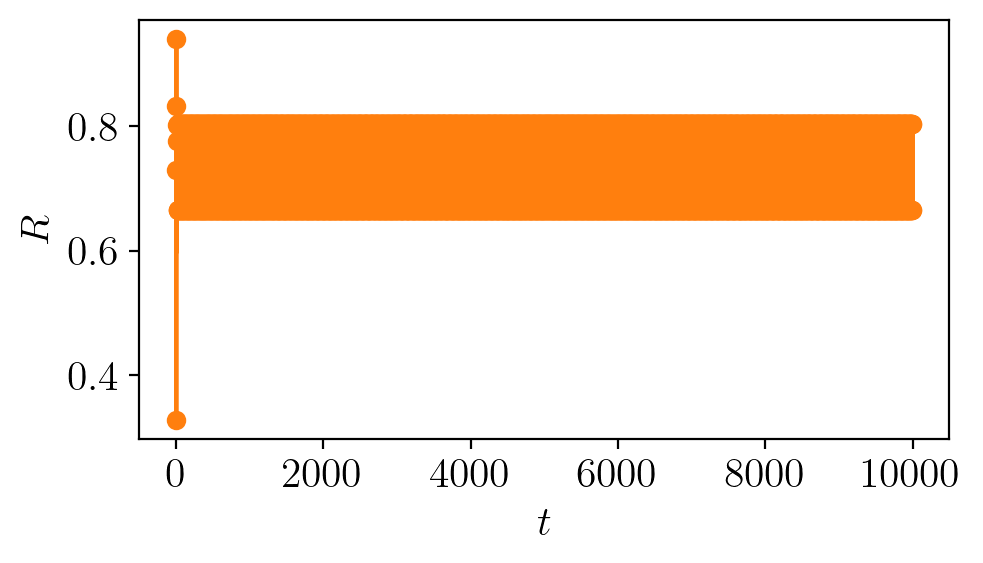

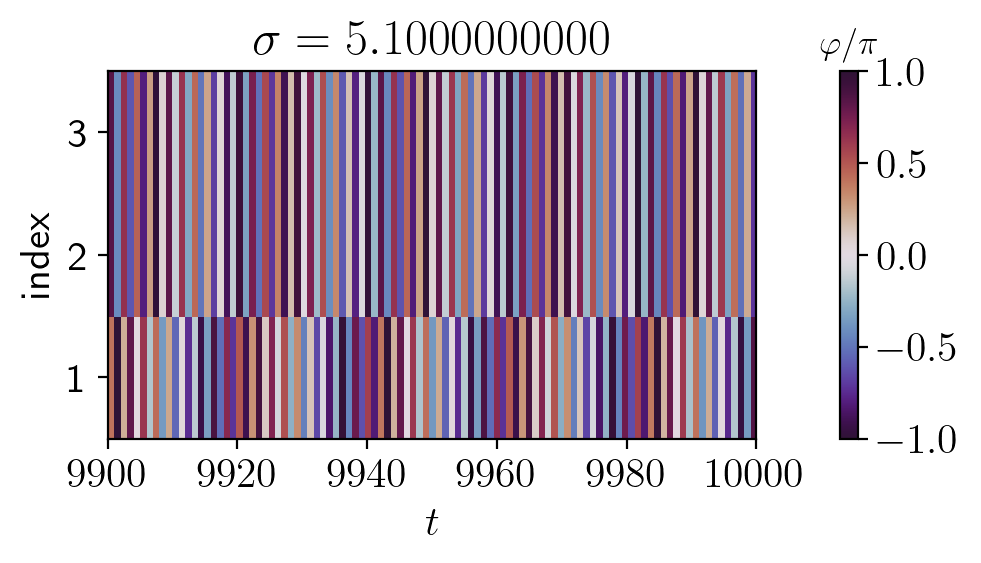

In [5]:
################################################################################3
%matplotlib inline

# figsize = np.array((9, 9)) * 0.5
# dpi = 200 if 'inline' in matplotlib.get_backend() else 100
# # plt_tmin, plt_tmax = ini_t, max_t
# plt_tmin, plt_tmax = max_t * 0.9, max_t
# resampling_fct, interp1d_kind = None, 'linear'
# sps.show_fig_fun(prb1, sps.core_trajectory2D, figsize=figsize, dpi=dpi, 
#                  plt_tmin=plt_tmin, resampling_fct=resampling_fct)
# ----------------------------------
figsize = np.array((16, 9)) * 0.3
dpi = 200 if 'inline' in matplotlib.get_backend() else 100
plt_tmin, plt_tmax = max_t * 0.99, max_t
resampling_fct, interp1d_kind = 1, 'linear'
# ----------------------------------
cmap=plt.get_cmap('bwr')
fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
t_plot, avg_all = sps.cal_avrPhaseVelocity(problem=prb1, t_tmin=plt_tmin, t_tmax=plt_tmax,
                                           resampling_fct=resampling_fct, interp1d_kind=interp1d_kind,
                                           tavr=eval_dt, npabs=False)
# sort_idx = np.argsort(np.mean(avg_all[:, t_plot > t_plot.max() / 2], axis=-1))
sort_idx = (2, 0, 1)
obj_idx = np.arange(1, prb1.n_obj + 1)
deta_all = avg_all[sort_idx, :] - avg_all[sort_idx[0], :] 
vmm = np.max(np.abs(deta_all))
norm = Normalize(vmin=-vmm, vmax=vmm)
c = axi.pcolorfast(t_plot, obj_idx, deta_all, cmap=cmap, norm=norm)
clb = fig.colorbar(c, ax=axi)
clb.ax.set_title('$\\delta \\eta$', fontsize='small')
axi.set_xlabel('$t$')
axi.set_ylabel('index')
axi.set_xlim(t_plot.min(), t_plot.max())
axi.set_ylim(1, prb1.n_obj)

# ----------------------------------
cmap = sps.twilight_diverging()
sps.show_fig_fun(prb1, sps.core_avrPhaseVelocity, figsize=figsize, dpi=dpi, 
                 plt_tmin=plt_tmin, plt_tmax=plt_tmax, resampling_fct=resampling_fct, 
                 npabs=False, cmap=cmap, 
                 vmin=None, vmax=None, tavr=eval_dt, return_info=True)
# ----------------------------------
markevery, linestyle = 0.3, 'o-C1', 
fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')

# xlim, ylim = (1e-1, 2e3), (-0.1, 1.05e0)
t_hist, cplx_R = sps.cal_polar_order(prb1, t_tmax=np.inf)
odp_R = np.linalg.norm(cplx_R, axis=-1)
axi.plot(t_hist, odp_R, linestyle, markevery=markevery, )
axi.set_xlabel('$t$')
axi.set_ylabel('$R$')
# axi.set_xscale('log')
# # axi.set_yscale('log')
# axi.set_xlim(*xlim)
# axi.set_ylim(*ylim)
# axi.spines[['top', 'right']].set_visible(False)
# axi.spines['left'].set_position(('data', xlim[0]))
# axi.spines['bottom'].set_position(('data', ylim[0]))
# axi.plot(1, ylim[0], ">k", transform=axi.get_yaxis_transform(), clip_on=False)
# axi.plot(xlim[0], 1, "^k", transform=axi.get_xaxis_transform(), clip_on=False)
# ----------------------------------
cmap = plt.get_cmap('twilight_shifted')
sps.show_fig_fun(prb1, sps.core_avrPhase, figsize=figsize, dpi=dpi, 
                 plt_tmin=plt_tmin, plt_tmax=plt_tmax, 
                 resampling_fct=resampling_fct, cmap=cmap, 
                 tavr=eval_dt, sort_type='normal')

Text(0, 0.5, '$\\eta / \\pi$')

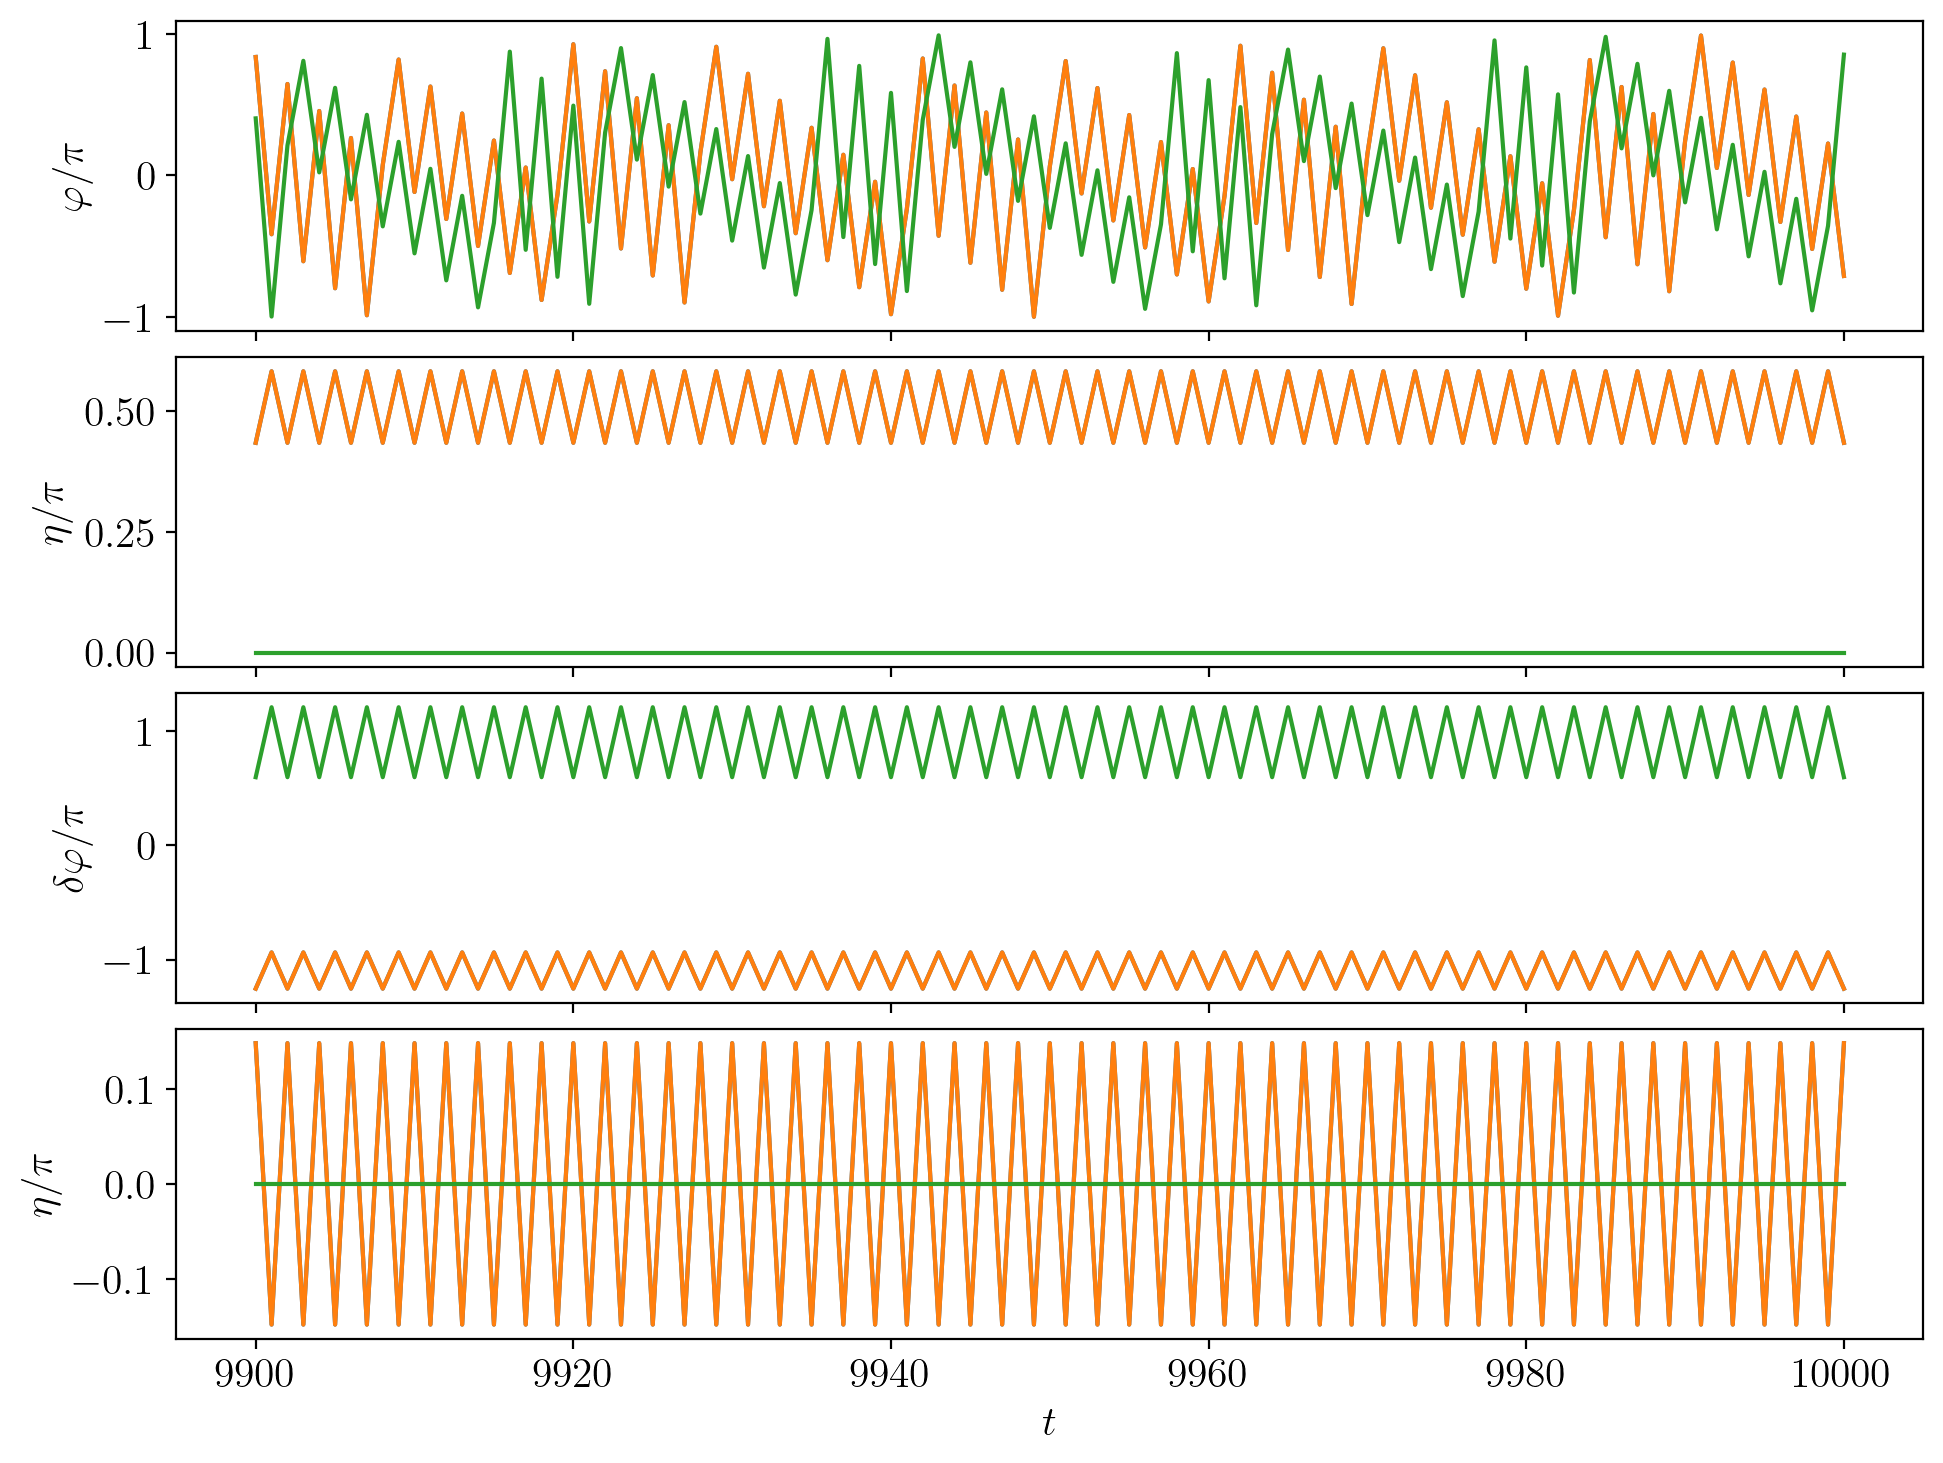

In [6]:
# ----------------------------------
figsize = np.array((12, 9)) * 0.8
dpi = 200 if 'inline' in matplotlib.get_backend() else 100
plt_tmin, plt_tmax = max_t * 0.99, max_t
resampling_fct, interp1d_kind = 1, 'linear'
sort_idx = np.array((0, 1, 2))
t_hist = prb1.t_hist
tidx = (t_hist >= plt_tmin) * (t_hist <= plt_tmax)
phi_list = np.vstack([obji.phi_hist for obji in prb1.obj_list])[sort_idx]
eta_list = spf.warpToPi(phi_list - phi_list[-1])
W_list = np.vstack([obji.W_hist for obji in prb1.obj_list])[sort_idx]
deta_list = spf.warpToPi(W_list - W_list[-1])

# ----------------------------------
fig, axs = plt.subplots(4, 1, figsize=figsize, dpi=dpi, 
                        constrained_layout=True, sharex=True)
fig.patch.set_facecolor('white')
axi = axs[0]
axi.plot(t_hist[tidx], phi_list.T[tidx] / np.pi)
# axi.set_xlabel('$t$')
axi.set_ylabel('$\\varphi / \\pi$')
# 
axi = axs[1]
axi.plot(t_hist[tidx], eta_list.T[tidx] / np.pi)
# axi.set_xlabel('$t$')
axi.set_ylabel('$\\eta / \\pi$')
# 
axi = axs[2]
axi.plot(t_hist[tidx], W_list.T[tidx] / np.pi)
# axi.set_xlabel('$t$')
axi.set_ylabel('$\\delta \\varphi / \\pi$')
# 
axi = axs[3]
axi.plot(t_hist[tidx], deta_list.T[tidx] / np.pi)
axi.set_xlabel('$t$')
axi.set_ylabel('$\\eta / \\pi$')



In [7]:
print(phi_list[:, tidx][:, 0], )
print(W_list[:, tidx][:, 0], )
print(eta_list[:, tidx][:, 0], )
print(deta_list[:, tidx][:, 0], )
print(eta_list[:, tidx].max() + eta_list[:, tidx].min(), )

[2.63263 2.63263 1.26843]
[-3.93978 -3.93978  1.87862]
[ 1.3642  1.3642 -0.    ]
[ 0.46479  0.46479 -0.     ]
1.8289887214634177


In [8]:
t1, t2, t3 = phi_list[:, tidx][:, 0]
phaseLag2D = 0.1 * np.pi * np.pi
q1 = spf.warpToPi((align / (nptc - 1) * 
                   (np.sin(t2 - t1 - phaseLag2D) + np.sin(t3 - t1 - phaseLag2D))))
q2 = spf.warpToPi((align / (nptc - 1) * 
                   (np.sin(t1 - t2 - phaseLag2D) + np.sin(t3 - t2 - phaseLag2D))))
q3 = spf.warpToPi((align / (nptc - 1) * 
                   (np.sin(t1 - t3 - phaseLag2D) + np.sin(t2 - t3 - phaseLag2D))))
print(q1, q2, q3)
print(q1 - q3)

2.3434084119580314 2.3434084119580314 1.8786214158332228
0.46478699612480856


In [9]:
t1, t2 = eta_list[:, tidx].max(), eta_list[:, tidx].min()
phaseLag2D = 0.1 * np.pi * np.pi
q1 = spf.warpToPi((-align / (nptc - 1) * 
                   (np.sin(t1 - t2 + phaseLag2D) + np.sin(t1 + phaseLag2D))))
q2 = spf.warpToPi((-align / (nptc - 1) * 
                   (np.sin(t2 - t1 + phaseLag2D) + np.sin(t2 + phaseLag2D))))
q3 = spf.warpToPi((-align / (nptc - 1) * 
                   (np.sin(-t1 + phaseLag2D) + np.sin(-t2 + phaseLag2D))))
print(q1, q2, q3)
print(q1 - q3)

-1.6315844794516714 -0.22531533204667253 -0.22531533204667253
-1.4062691474049989


In [10]:
t1, t2 = eta_list[:, tidx].max(), eta_list[:, tidx].min()
phaseLag2D = 0.1 * np.pi * np.pi
# phaseLag2D = 0
q1 = spf.warpToPi((np.sin(t1 - t2 + phaseLag2D) + np.sin(t1 + phaseLag2D) + 
                   np.sin(t1 - phaseLag2D) + np.sin(t2 - phaseLag2D)
                  ) * (-align / (nptc - 1)) )
q2 = spf.warpToPi((np.sin(t2 - t1 + phaseLag2D) + np.sin(t2 + phaseLag2D) + 
                   np.sin(t2 - phaseLag2D) + np.sin(t1 - phaseLag2D)
                  ) * (-align / (nptc - 1)) )
print(q1, q2) 


-1.4062691474049984 -0.0
